# **Thresholding, Binarization & Adaptive Thresholding**

####**In this lesson we'll learn:**
1. Binarized Images
2. Thresholding Methods
3. Adaptive Thresholding
4. SkImage's Threshold Local

# **Great Blog:**
- https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
- https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html (Multi-Level Thresholding)
- https://learnopencv.com/otsu-thresholding-with-opencv/
- https://www.youtube.com/watch?v=8TkligJJCAQ
- https://towardsdatascience.com/how-to-perform-image-segmentation-with-thresholding-using-opencv-b2a78abb07ac (good)
- https://www.freedomvc.com/index.php/2021/06/06/image-thresholding/ (Excellent)
- https://www.meccanismocomplesso.org/en/opencv-python-the-otsus-binarization-for-thresholding/

### **Guidelines**
- Some guidelines for using Thresholding:

1. Stretch the image to use the whole Dynamic Range (DR).
2. Apply some Denoising (Very very gentle).
3. Median with small radius would be a good idea.
4. Unless you hand tweak the Threshold, Otsu's Method generally yields good results for this kind of tasks (Text on background).
5. If one use Adaptive Local Methods (Mean / Gaussian based) the Radius is another hyper parameter to tweak.

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    h,w = image.shape[0], image.shape[1]
    aspect_ratio = h/w
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **Thresholding Methods** 
- **cv2.THRESH_BINARY:** If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).
- **cv2.THRESH_BINARY_INV:** Inverted or Opposite case of cv2.THRESH_BINARY.
- **cv.THRESH_TRUNC:** If pixel intensity value is greater than threshold, it is truncated to the threshold. The pixel values are set to be the same as the threshold. All other values remain the same.
- **cv.THRESH_TOZERO:** Pixel intensity is set to 0, for all the pixels intensity, less than the threshold value.
- **cv.THRESH_TOZERO_INV:** Inverted or Opposite case of cv2.THRESH_TOZERO.

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Screenshot%202020-11-17%20at%2012.57.55%20am.png)
![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Screenshot%202020-11-17%20at%2012.58.09%20am.png)

https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

In [2]:
!wget https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/scan.jpeg

--2023-04-30 07:37:05--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/scan.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171933 (168K) [image/jpeg]
Saving to: ‘scan.jpeg’

scan.jpeg           100%[===================>] 167.90K  --.-KB/s    in 0.02s   

2023-04-30 07:37:05 (10.1 MB/s) - ‘scan.jpeg’ saved [171933/171933]



### **Simple Thresholding:**
- we manually supply parameters to segment the image — this works extremely well in controlled lighting conditions where we can ensure high contrast between the foreground and background of the image.

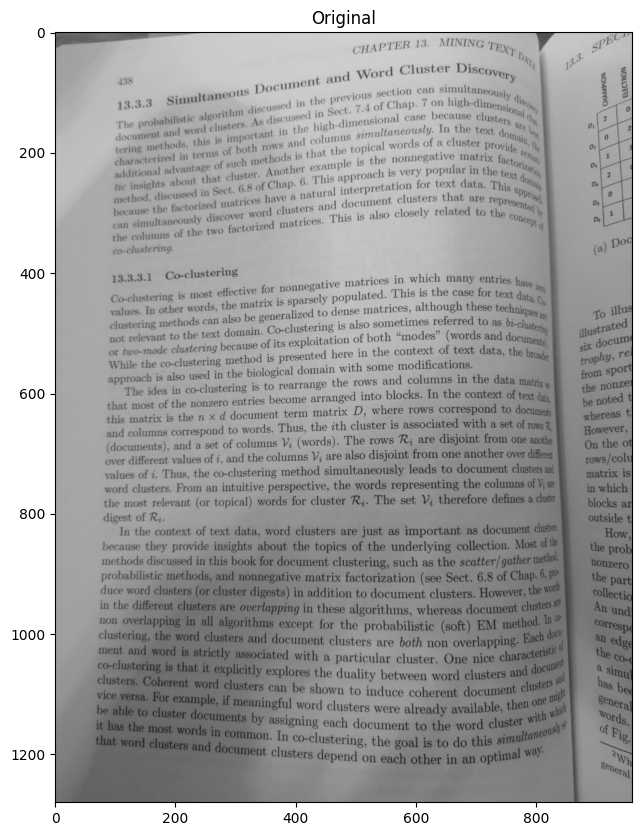

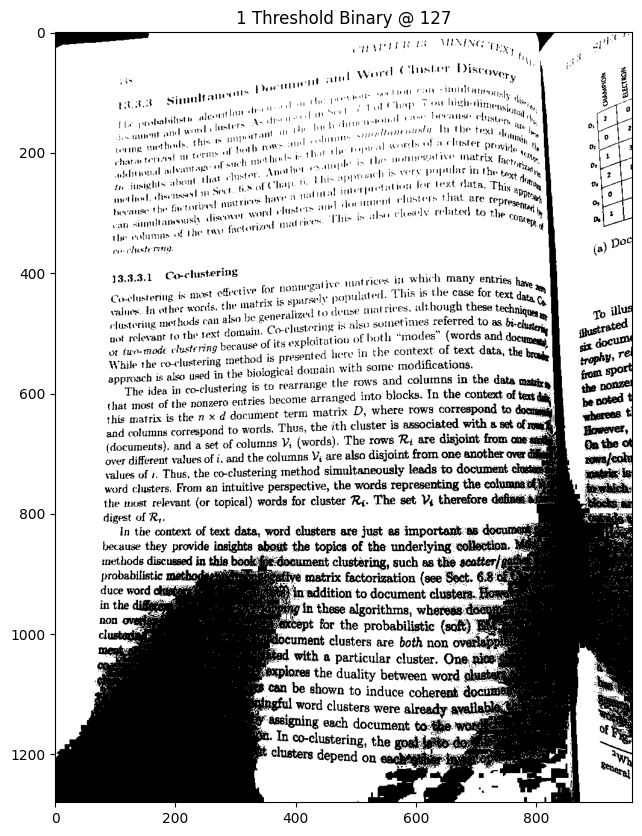

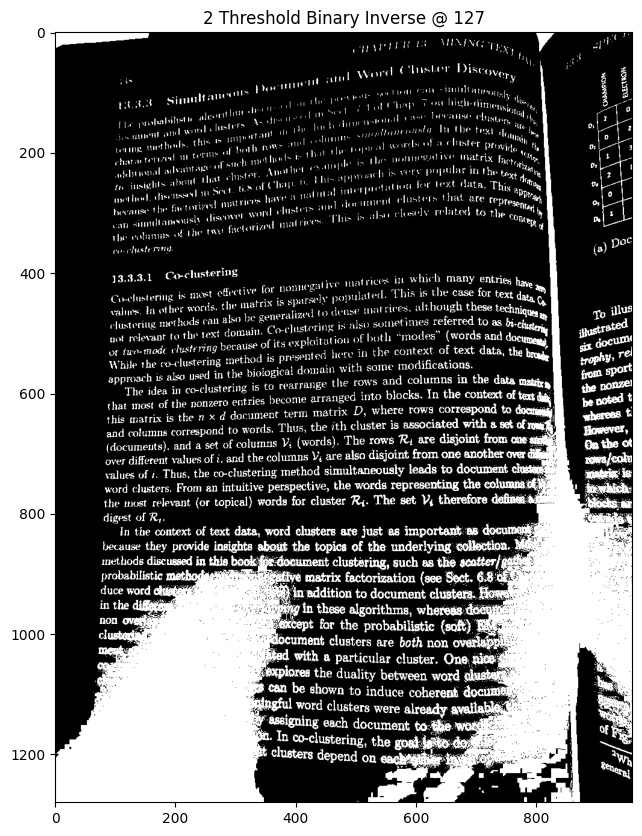

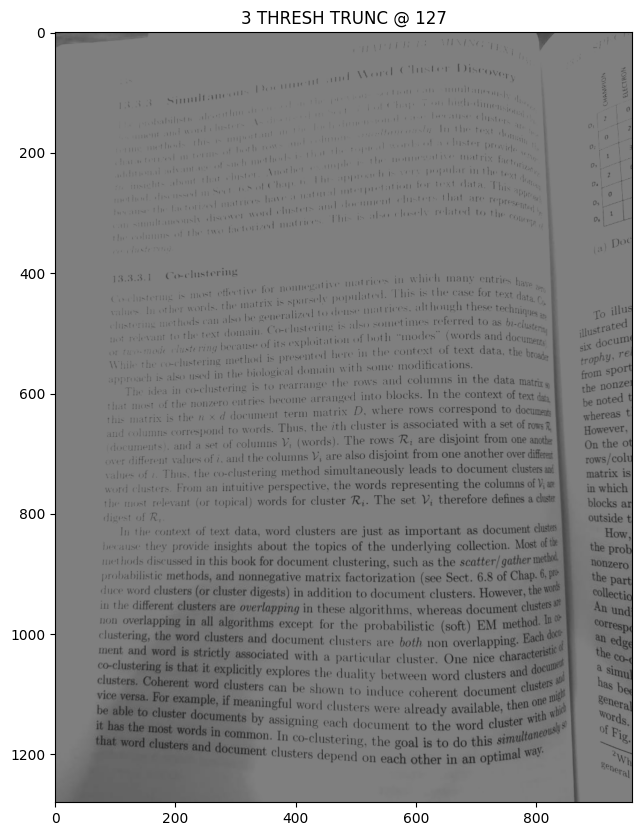

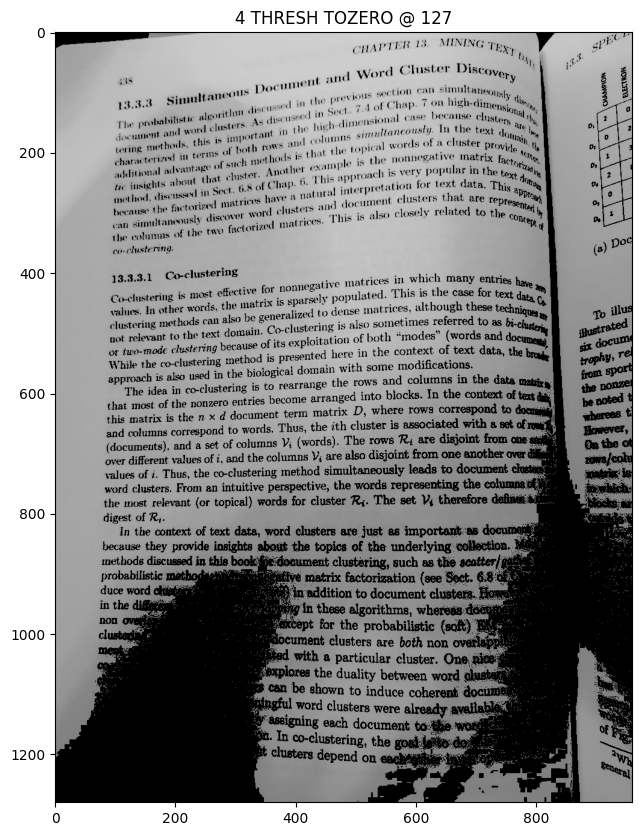

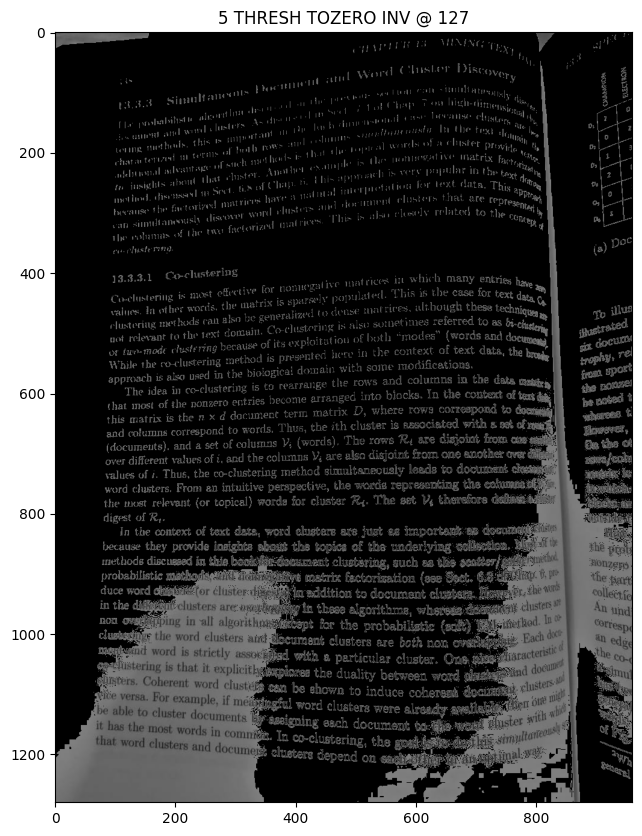

In [3]:
# Load our image as greyscale 
image = cv2.imread('scan.jpeg',0)
imshow("Original", image)

# Values below 127 goes to 0 or black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow('1 Threshold Binary @ 127', thresh1)

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
imshow('2 Threshold Binary Inverse @ 127', thresh2)

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
imshow('3 THRESH TRUNC @ 127', thresh3)

# Values below 127 go to 0, above 127 are unchanged  
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
imshow('4 THRESH TOZERO @ 127', thresh4)

# Reverse of the above, below 127 is unchanged, above 127 goes to 0
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
imshow('5 THRESH TOZERO INV @ 127', thresh5)

#### **Adaptive Thresholding**
- Instead of trying to threshold an image globally using a single value, instead breaks the image down into smaller pieces, and thresholds each of these pieces separately and individually.
- **OTSU** _ Attempt to be more dynamic and automatically compute the optimal threshold value based on the input image.

1. ADAPTIVE_THRESH_MEAN_C
2. THRESH_OTSU

#### **cv2.adaptiveThreshold Parameters**

``**cv2.adaptiveThreshold**(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst``

- **src** – Source 8-bit single-channel image.
- **dst** – Destination image of the same size and the same type as src .
- **maxValue** – Non-zero value assigned to the pixels for which the condition is satisfied. See the details below.
- **adaptiveMethod** – Adaptive thresholding algorithm to use, ADAPTIVE_THRESH_MEAN_C or ADAPTIVE_THRESH_GAUSSIAN_C . See the details below.
- **thresholdType** – Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV .
- **blockSize** – Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
- **C** – Constant subtracted from the mean or weighted mean. Normally, it is positive but may be zero or negative as well.


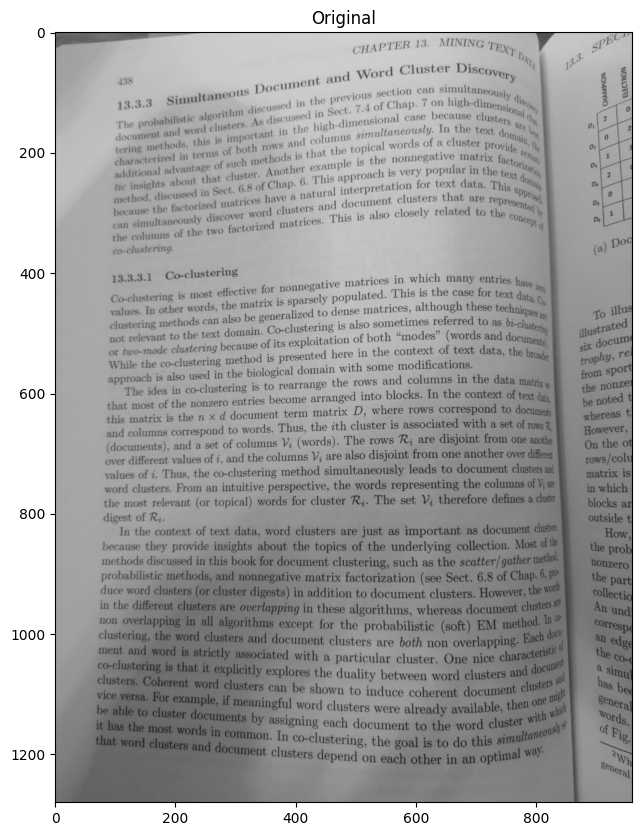

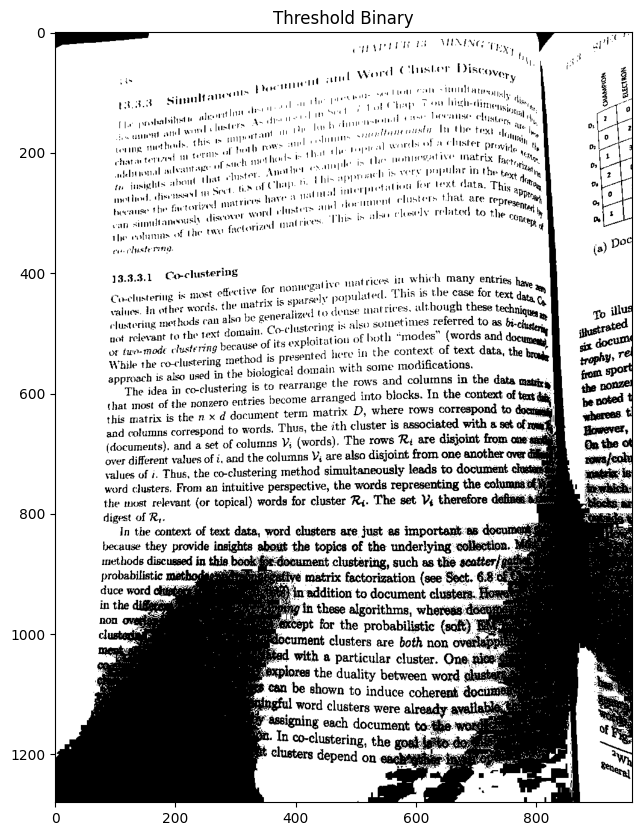

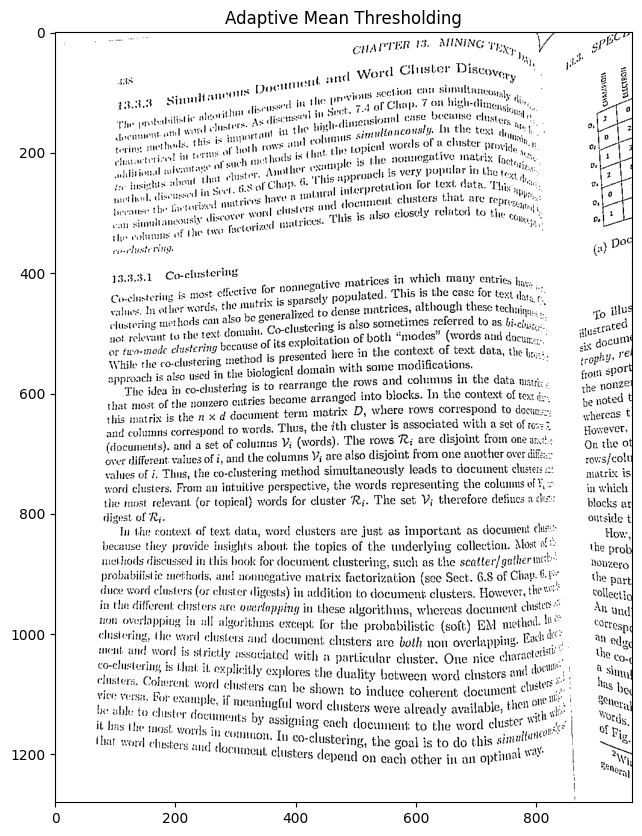

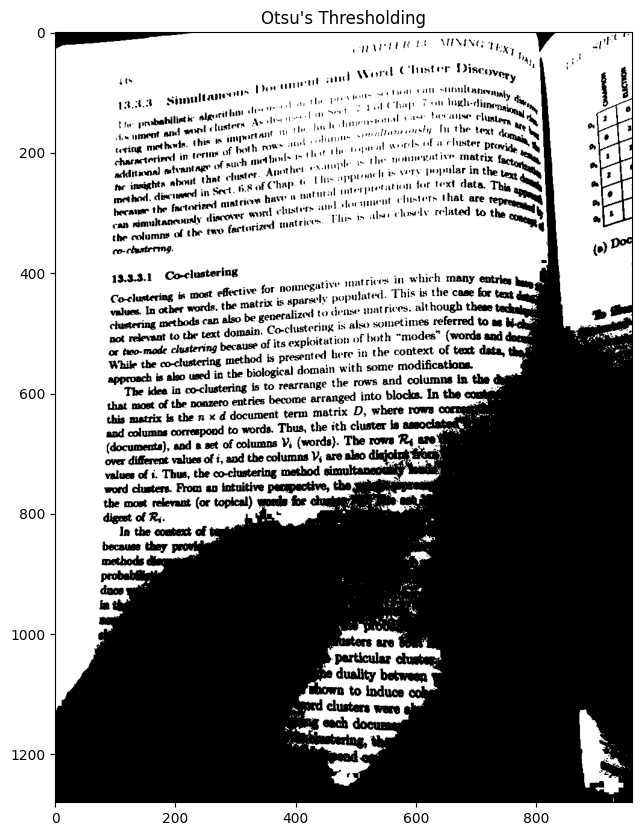

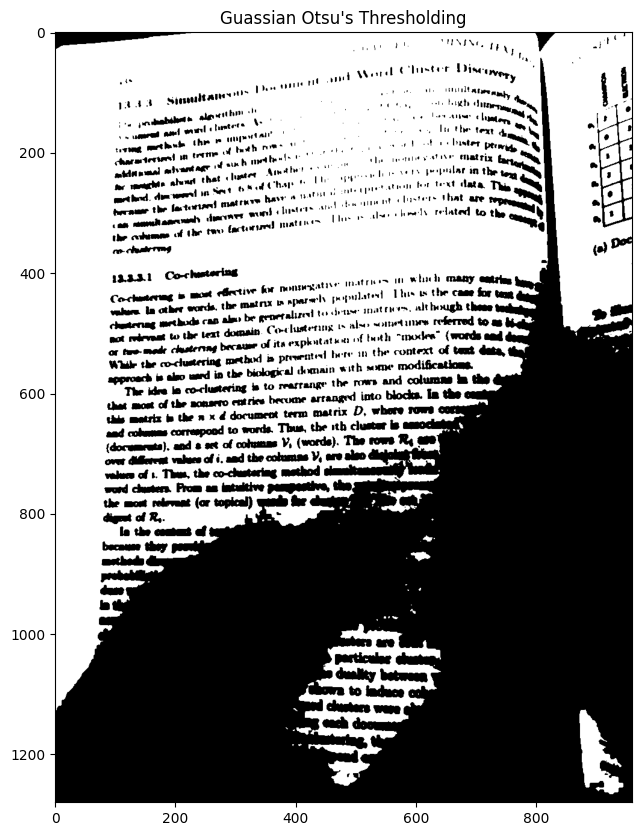

In [5]:
image = cv2.imread('scan.jpeg',0)
imshow("Original", image)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow('Threshold Binary', thresh1)

# It's good practice to blur images as it removes noise
image = cv2.GaussianBlur(image, (3, 3), 0)

# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
imshow("Adaptive Mean Thresholding", thresh) 

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Otsu's Thresholding", th2) 

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Guassian Otsu's Thresholding", th3) 

### **SkImage Threshold Local**


``threshold_local(image, block_size, offset=10)``

The threshold_local function, calculates thresholds in regions with a characteristic size ``block_size`` surrounding each pixel (i.e. local neighborhoods). Each threshold value is the weighted mean of the local neighborhood minus an ``offset`` value


https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html

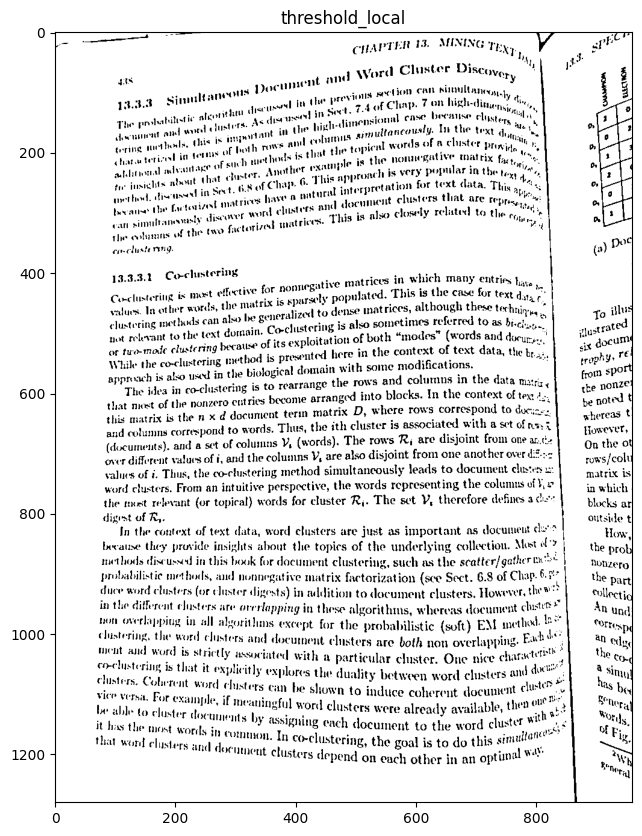

In [7]:
from skimage.filters import threshold_local

image = cv2.imread('scan.jpeg')

image = cv2.GaussianBlur(image, (3, 3), 0)
# We get the Value component from the HSV color space 
# then we apply adaptive thresholdingto 
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# Apply the threshold operation 
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh)

#### **Niblack and Sauvola Thresholding**
- Niblack and Sauvola thresholds are local thresholding techniques that are useful for images where the background is not uniform, especially for text recognition . 
- Instead of calculating a single global threshold for the entire image, several thresholds are calculated for every pixel by using specific formulae that take into account the mean and standard deviation of the local neighborhood (defined by a window centered around the pixel).

(-0.5, 383.5, 190.5, -0.5)

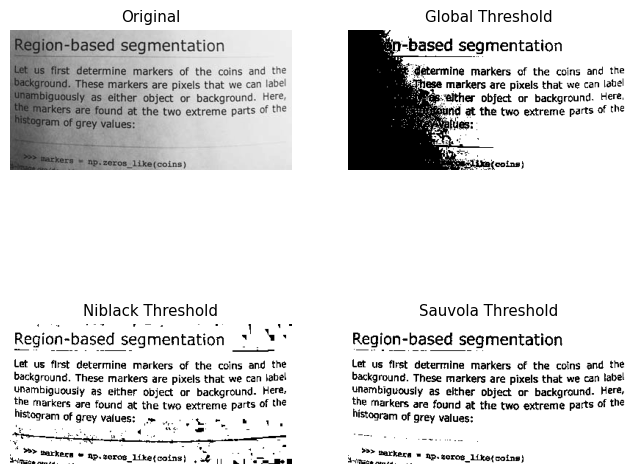

In [10]:
from skimage.data import page
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 9


image = page()
binary_global = image > threshold_otsu(image)

window_size = 25
thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8)
thresh_sauvola = threshold_sauvola(image, window_size=window_size)

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola

plt.figure(figsize=(8, 7))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Global Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')

### **CV2.threshold applications:**
- There are several applications you can build with the help of cv2.threshold.

1. Image segmentation applications where you separate objects based on pixel wise comparisons.
2. Background removal where you separate and remove foreground and background objects.
3. Optical Character Recognition (OCR) where you threshold to improve contrast and OCR accuracy.
4. Create a binary image where you threshold and convert and image into a binary image where each pixel is either 0 (black) or 255 (white).

### **Why Bluring is Important before Thresholding?** 

## **Answer - Noise**

![](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/otsu.jpg)

https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html